In [1]:
import pandas as pd

## 观测10000个数据的时间分布

In [21]:
% time sample = pd.read_csv('gy_contest_link_traveltime_training_data.txt',nrows=10000000,sep=';') # 车流量数据

Wall time: 7.62 s


In [22]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662384 entries, 0 to 7662383
Data columns (total 4 columns):
link_ID          uint64
date             object
time_interval    object
travel_time      float64
dtypes: float64(1), object(2), uint64(1)
memory usage: 233.8+ MB


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [23]:
% time tm_itvl=sample['time_interval'].str.replace('[','').str.replace(')','').str.split(',')

Wall time: 13.2 s


In [24]:
% time sample['t0'] = tm_itvl.apply(lambda x: x[0])

Wall time: 1.57 s


In [25]:
% time sample['t0'] = pd.to_datetime(sample['t0'])

Wall time: 2.09 s


Wall time: 344 ms


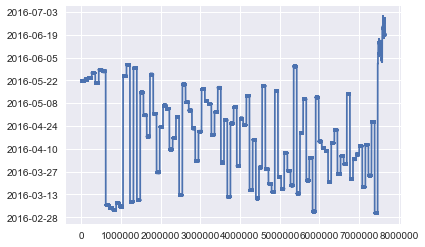

In [26]:
% time plt.plot(sample['t0'])

## 每个的link_ID的t0的情况(有多少条)

In [28]:
link_t0_num=sample[['link_ID','t0']].groupby('link_ID').count()

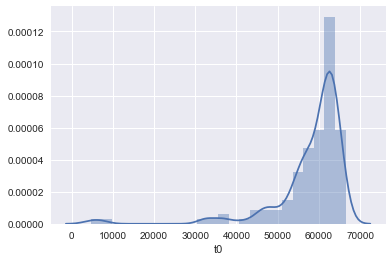

In [29]:
sns.distplot(link_t0_num['t0'])